# Plotting single patient result

The GUI saves results in two formats:
 - a `results.csv` file which provides a record of trial conditions (input SNR, participant response, estimator values, etc.);
 - a `finished.pkl` (or `paused.pkl`) format which contains the same information but in a `basie_estimator` class object, allowing for fast plotting of trial results.
 
This notebook showcases how the `basie_estimator` object can be used to quickly plot:
- the **psychometric function** obtained with the final SRT and slope estimates,
- a **probability plot** for the estimated parameters
- the estimator evolution with trial number as **overlapping psychometric functions**
- the **trial plot history**
- the Basie **cost function** evolution with trial number.

These plots are similar to those obtained with the [MATLAB implementation of Basie](http://www.ee.ic.ac.uk/hp/staff/dmb/voicebox/mdoc/v_mfiles/v_psycest.html).

## Loading trial information

Install libraries and import into the Jupyter notebook.

In [21]:
# %%capture
# ! pip install matplotlib
import pickle
import matplotlib as plt
import os
import sys
sys.path.append('..')
from utils.basie_class import *

Data location: 
- `foldpath` is the folder where the results are saved (default, `results` folder).
- `patientID` is the particpant ID (`"Participant"` in this demo)

In [2]:
foldpath =os.path.join('..','results')
patientID='Participant'

## Trial summary

The `basie_estimator` class contains a `summary()` function which can be used to obtain information about the experiment. It is a list of 3 elements:
- the first is an array containing the experiment parameters `[target SRT point, miss rate, guess rate, min SNR, max SNR, min slope, max slope]`
- the second is an array containing the Basie parameters (see [documentation](http://www.ee.ic.ac.uk/hp/staff/dmb/voicebox/mdoc/v_mfiles/v_psycest.html))
- the third is a record of all trial conditions

In [58]:
# find the particular results folder (named with date/time of experiment)
trialdatetime=[f for f in os.listdir(os.path.join(foldpath, patientID)) if '.DS_Store' not in f][0]

# load the basie_estimator class object 
for file in os.listdir(os.path.join(foldpath, patientID, trialdatetime)):
    if 'pkl' in file:
        with open(os.path.join(foldpath, patientID, trialdatetime, file), 'rb') as f:
            [estimate, __,__, __, __]=pickle.load(f)
print('------- Experiment summary -------\n')
print('Experiment parameters:', estimate.summary()[0][:].T, '\n')
print('Basie parameters:', estimate.summary()[1].T, '\n')
print('Trial history:\n Model\t iSNR \t correct? \t SRT \t slope \t var SRT \t var Slope\n', estimate.summary()[2])

------- Experiment summary -------

Experiment parameters: [[  0.5    0.04   0.1  -20.    20.     0.02   0.5 ]] 

Basie parameters: [4.0e+01 2.1e+01 3.0e+01 5.0e-01 2.0e-01 2.0e-02 4.0e+00 1.3e+00 2.0e+00
 1.0e+00 1.0e+00 1.0e+00 1.0e-04 2.0e+00 1.0e+01 5.0e-01 1.0e-01 1.0e+00
 1.0e-02 5.0e-01] 

Trial history:
 Model	 iSNR 	 correct? 	 SRT 	 slope 	 var SRT 	 var Slope
 [[  0.           0.           1.          -6.9028756   -2.29125883
    3.52144891   0.48790501]
 [  0.          -6.           1.         -11.19607909  -2.22959952
    3.16311955   0.48656694]
 [  0.         -11.           0.          -9.09245996  -1.95789219
    3.84976254   0.75808475]
 [  0.          -9.           1.         -12.39335334  -1.98123062
    4.05916566   0.92683193]
 [  0.         -12.           0.          -9.31908302  -1.74276075
    3.41576369   0.94732833]
 [  0.          -8.           1.         -10.5888928   -1.57700788
    2.47202863   1.01161141]
 [  0.         -10.           0.          -9.32293

## Psychometric function plot
This plots the participant's psychometric curves for each reverberant condition using the **final** SRT and slope estimates.

Estimated SRT: -8.379732240763923 dB
Estimated log-slope at SRT: -2.3856418475923498 dB^-1


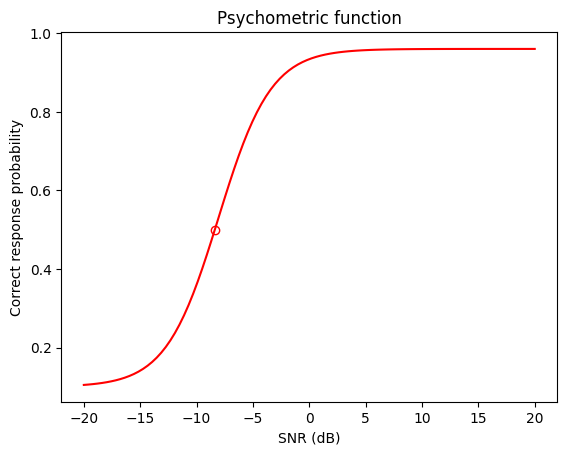

In [59]:
# print final estimates
print('Estimated SRT:', estimate.summary()[-1][-1][3], 'dB')
print('Estimated log-slope at SRT:', estimate.summary()[-1][-1][4], 'dB^-1')
estimate.plot('f', 0)

## Probability plots
This plots the **joint posterior probability density function** of the SRT and slope parameters. It gives the probability that the true parameters take a certain value given the measurements we have made - brighter colors indicate a higher probability.

The x-axis gives the SRT values and the y-axis gives the slope values.

A more densely concentrated plot can be seen as more 'confident' in the final estimates.

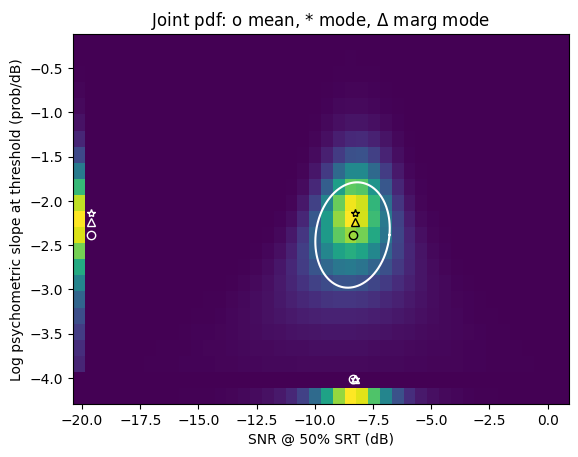

In [61]:
estimate.plot('p',0)

## Psychometric curve history
This plots the evolution of the psychometric curve estimation over the 40 samples. Lighter lines correspond to early samples while darker lines show recent estimates. This is a simple visualisation which gives less information than the probability plot above - it might still give an idea of the variance in the estimate. 

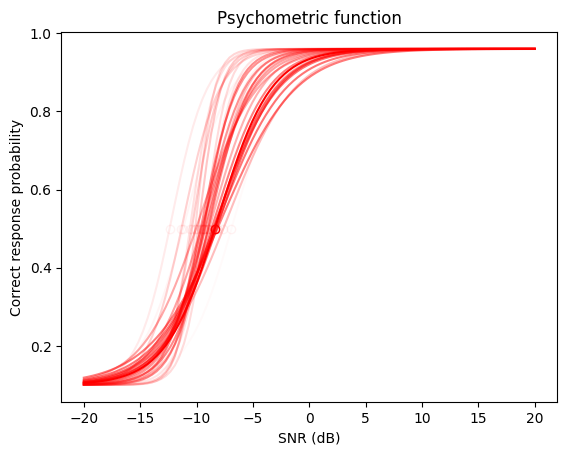

In [73]:

partestimate=basie_estimator()
partestimate.initialise(1, modelp=estimate.summary()[0], availsnr=np.linspace(-20,20,41).T, basiep=estimate.summary()[1])
for i in range(len(estimate.summary()[2])):
    response=estimate.summary()[2][i][2]
    snr=estimate.summary()[2][i][1]
    [__, __, m, v] =partestimate.update(0, probesnr=snr, response=response, robust=False)
    partestimate.plot('f', 0)
    if i>0:
        plt.gca().lines[2*i-2].set_alpha(i/(40+10))
        plt.gca().lines[2*i-2].set_color('red')
        plt.gca().lines[2*i-1].set_alpha(0.05)
        plt.gca().lines[2*i-1].set_color('red')

# Trial history plot
These plots jointly show the response and estimation history.
- The red **+**s and blue **o**s indicate a correct/incorrect response at a given trial number and the corresponding input SNR.
- The full blue line shows the SRT estimate as a function of trial number
- The upper/lower dotted blue lines show the estimated 25%/75% intelligibilty points obtained using the slope estimate

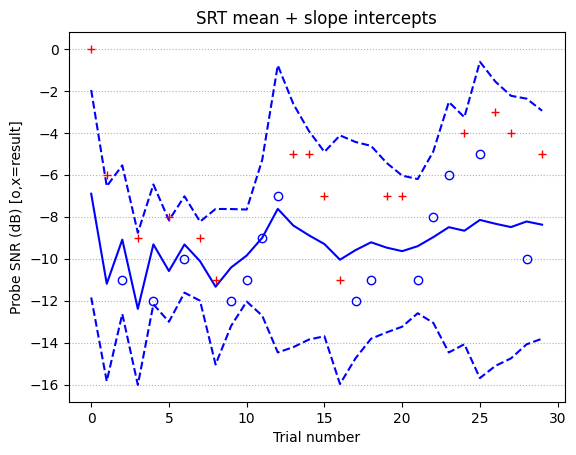

In [75]:
estimate.plot('h',0)

# Cost function evolution
This gives an idea of whether the algorithm has converged to a solution. The red line shows the convergence for SRT only, and the blue curve shows convergence for SRT and slope jointly.

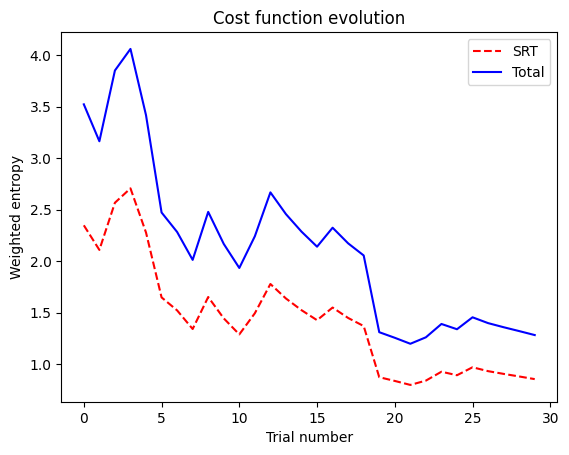

In [77]:
estimate.plot('c',0)